## 17.1.1 数据预处理及探索

In [1]:
from pandas import read_csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

#### 1 数据加载

In [2]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [3]:
dataset = read_csv('./raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0


#### 2 去除"No"字段

In [4]:
dataset.drop('No', axis=1, inplace=True)

In [5]:
dataset

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


#### 3 列名替换

In [6]:
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [7]:
dataset.index.name = 'date'

In [8]:
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


#### 4 缺失值填充

In [9]:
dataset['pollution'].fillna(0, inplace=True)      

In [10]:
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


#### 5 去掉第一天数据（前24小时）

In [11]:
dataset = dataset[24:]

In [12]:
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


#### 6 保存处理好的数据

In [13]:
dataset.to_csv('my_pollution.csv')

#### 7 可视化分析

In [14]:
dataset = pd.read_csv("./pollution.csv", index_col=0)
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [15]:
values = dataset.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

In [16]:
len(values)

43800

In [17]:
len(values[0]) # 除去日期，一共8个特征

8

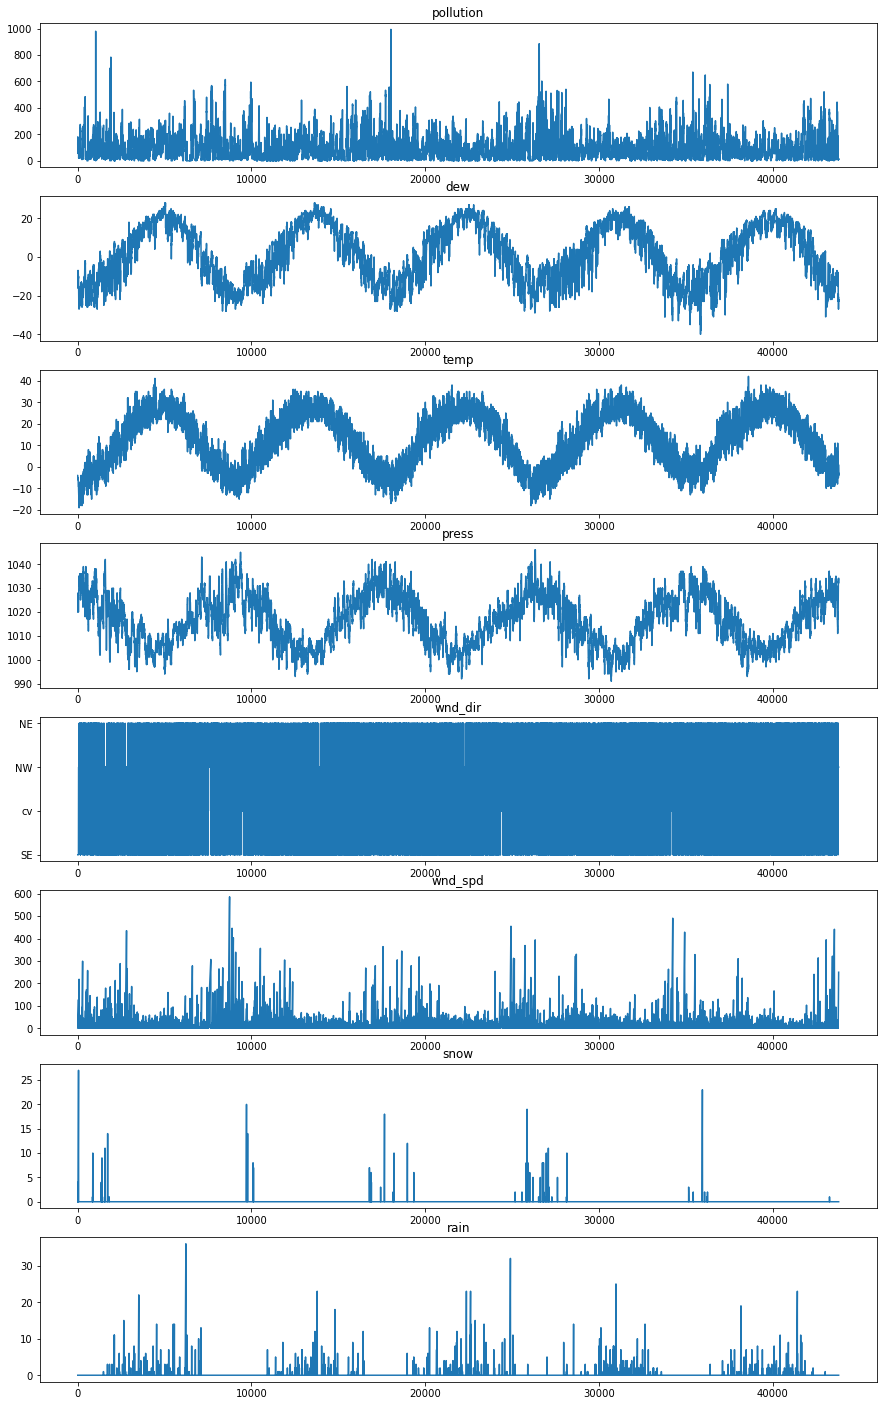

In [18]:
plt.figure(figsize=(15,25))
for group in range(8):
    plt.subplot(8, 1, group+1)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group])
plt.show()

#### 8 将wnd_dir字段进行标签编码

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [21]:
values[0]

array([129.0, -16, -4.0, 1020.0, 'SE', 1.79, 0, 0], dtype=object)

In [22]:
values[0][4]

'SE'

In [23]:
values[:, 4] = encoder.fit_transform(values[:, 4])

In [24]:
values[0]

array([129.0, -16, -4.0, 1020.0, 2, 1.79, 0, 0], dtype=object)

In [25]:
values = values.astype("float32")

In [26]:
values

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

#### 9 数据归一化

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaled = scaler.fit_transform(values)
scaled.shape

(43800, 8)

In [30]:
scaled

array([[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001, 0.        ,
        0.        ],
       [0.14889336, 0.36764708, 0.24590163, ..., 0.00381099, 0.        ,
        0.        ],
       [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.41399646, 0.        ,
        0.        ],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.4208665 , 0.        ,
        0.        ],
       [0.01207243, 0.2794118 , 0.26229507, ..., 0.42621556, 0.        ,
        0.        ]], dtype=float32)

In [31]:
scaled[:, 4]

array([0.6666667 , 0.6666667 , 0.6666667 , ..., 0.33333334, 0.33333334,
       0.33333334], dtype=float32)

#### 10 将时间序列数据转换为适用于监督学习的数据

In [32]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [33]:
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [34]:
reframed.shape

(43799, 16)

In [35]:
reframed.to_csv('reframed-1.csv')

In [36]:
# 去掉不需要预测的列，即var2(t)	var3(t)	var4(t)	var5(t)	var6(t)	var7(t)	var8(t)
reframed.drop(reframed.columns[[-1, -2, -3, -4, -5, -6, -7]], axis=1, inplace=True)
reframed.to_csv('reframed-2.csv')

In [37]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658
...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [38]:
reframed.shape

(43799, 9)

#### 11 构造训练集和测试集

In [39]:
values = reframed.values

+ LSTM模型不能shufle, 因为这样切分后时间序列不连续
+ XGBoost可以shufle， 因为每天样本可以看成是相互独立的

In [40]:
n_train_hours = int(len(values)*0.8)
n_train_hours

35039

In [41]:
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [42]:
train.shape, test.shape

((35039, 9), (8760, 9))

In [43]:
train_X , train_y = train[:, :-1], train[:, -1]

In [44]:
test_X, test_y = test[:, :-1], test[:, -1]

In [45]:
train_X.shape

(35039, 8)

In [46]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((35039, 8), (35039,), (8760, 8), (8760,))

#### 12 转换为LSTM需要的数据格式

In [47]:
# 3D格式，[样本数，时间步， 特征数]

In [48]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [49]:
train_X.shape, test_X.shape

((35039, 1, 8), (8760, 1, 8))

### 17.1.2 构建LSTM模型

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#### 1模型搭建 

In [51]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer="adam", loss="mse")

#### 2 模型训练

In [54]:
result = model.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(test_X, test_y))

Epoch 1/10
548/548 [==============================] - 2s 3ms/step - loss: 0.0022 - val_loss: 6.0519e-04
Epoch 2/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9742e-04 - val_loss: 6.0449e-04
Epoch 3/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9699e-04 - val_loss: 6.2311e-04
Epoch 4/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9828e-04 - val_loss: 6.1111e-04
Epoch 5/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9699e-04 - val_loss: 6.0471e-04
Epoch 6/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9339e-04 - val_loss: 5.8788e-04
Epoch 7/10
548/548 [==============================] - 1s 2ms/step - loss: 7.8784e-04 - val_loss: 6.0388e-04
Epoch 8/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9049e-04 - val_loss: 5.8863e-04
Epoch 9/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9080e-04 - val_loss: 5.8811e-04
Epoch 10/10
548/548 [===========

#### 3 绘制训练loss和测试集loss

In [55]:
line1 = result.history["loss"]
line2 = result.history["val_loss"]

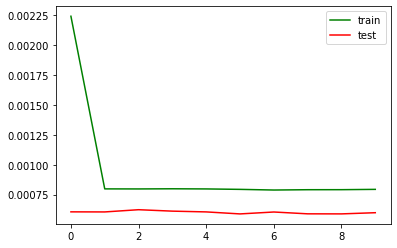

In [56]:
plt.plot(line1, label="train", c="g")
plt.plot(line2, label="test", c="r")
plt.legend(loc="best")
plt.show()

#### 4 模型预测

In [57]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

#### 5 呈现原始数据，训练集预测结果，测试集预测结果

In [58]:
test_predict

array([[0.02674879],
       [0.02766172],
       [0.05273748],
       ...,
       [0.01204563],
       [0.01212025],
       [0.01057017]], dtype=float32)

In [59]:
def plot_img(source_data_set, train_predict, test_predict):
    # 原始数据蓝色
    plt.plot(source_data_set[:, -1], label="real", c="b")
    # 训练集预测结果绿色
    plt.plot(list(train_predict), label="train_predict", c="g")
    #  测试集预测结果红色
    plt.plot([None for _ in train_predict] + list(test_predict), label="test_predict", c="r")
    plt.legend(loc="best")
    plt.show()

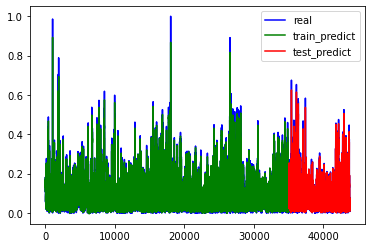

In [60]:
plot_img(values, train_predict, test_predict)

#### 6 采用前3天预测后一天的LSTM模型

In [61]:
reframed = series_to_supervised(scaled, 3, 1)
reframed.drop(reframed.columns[[-1, -2, -3, -4, -5, -6, -7]], axis=1, inplace=True)
values = reframed.values
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X , train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [62]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
result = model.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(test_X, test_y))

Epoch 1/10
548/548 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 7.7718e-04
Epoch 2/10
548/548 [==============================] - 1s 2ms/step - loss: 8.4192e-04 - val_loss: 6.7478e-04
Epoch 3/10
548/548 [==============================] - 1s 2ms/step - loss: 8.0408e-04 - val_loss: 6.2360e-04
Epoch 4/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9553e-04 - val_loss: 5.9530e-04
Epoch 5/10
548/548 [==============================] - 1s 2ms/step - loss: 7.8330e-04 - val_loss: 5.9201e-04
Epoch 6/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9243e-04 - val_loss: 6.1953e-04
Epoch 7/10
548/548 [==============================] - 1s 2ms/step - loss: 7.9259e-04 - val_loss: 5.9242e-04
Epoch 8/10
548/548 [==============================] - 1s 2ms/step - loss: 7.8392e-04 - val_loss: 5.9118e-04
Epoch 9/10
548/548 [==============================] - 1s 2ms/step - loss: 7.7891e-04 - val_loss: 5.9333e-04
Epoch 10/10
548/548 [===========

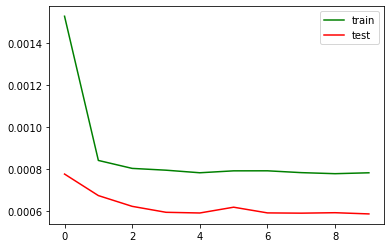

In [63]:
line1 = result.history["loss"]
line2 = result.history["val_loss"]
plt.plot(line1, label="train", c="g")
plt.plot(line2, label="test", c="r")
plt.legend(loc="best")
plt.show()

In [64]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

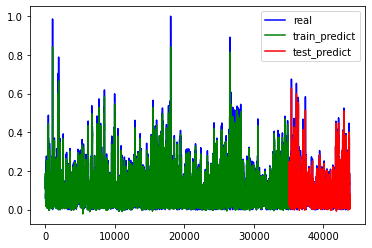

In [65]:
plot_img(values, train_predict, test_predict)

+ 从mse上看，一天预测一天的mse最终为5.9801e-04， 3天预测1天的mse为5.8759e-04， 即3天的模型效果好了一点点

### 17.1.3 采用ARIMA模型

In [66]:
from itertools import product
import statsmodels.api as sm

#### 1 设置参数范围

In [67]:
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 5)

In [68]:
parameters = product(ps, ds, qs)
parameters_list = list(parameters)

In [69]:
parameters_list[:5]

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4)]

#### 2寻找最优ARIMA模型参数

In [70]:
results = []
best_aic = float("inf") # 正无穷

In [72]:
%%time
for param in parameters_list:
    try:
        model = sm.tsa.statespace.SARIMAX(train_y,
                                order=(param[0], param[1], param[2]),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    print("参数: ", param, "训练完成")

参数:  (0, 1, 0) 训练完成
参数:  (0, 1, 1) 训练完成
参数:  (0, 1, 2) 训练完成
参数:  (0, 1, 3) 训练完成
参数:  (0, 1, 4) 训练完成
参数:  (0, 2, 0) 训练完成
参数:  (0, 2, 1) 训练完成
参数:  (0, 2, 2) 训练完成
参数:  (0, 2, 3) 训练完成
参数:  (0, 2, 4) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 3, 0) 训练完成
参数:  (0, 3, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 3, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 3, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 3, 4) 训练完成
参数:  (0, 4, 0) 训练完成
参数:  (0, 4, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 4, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 4, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (0, 4, 4) 训练完成
参数:  (1, 1, 0) 训练完成
参数:  (1, 1, 1) 训练完成
参数:  (1, 1, 2) 训练完成
参数:  (1, 1, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 1, 4) 训练完成
参数:  (1, 2, 0) 训练完成
参数:  (1, 2, 1) 训练完成
参数:  (1, 2, 2) 训练完成
参数:  (1, 2, 3) 训练完成
参数:  (1, 2, 4) 训练完成
参数:  (1, 3, 0) 训练完成
参数:  (1, 3, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 3, 2) 训练完成
参数:  (1, 3, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 3, 4) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 4, 0) 训练完成
参数:  (1, 4, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 4, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 4, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (1, 4, 4) 训练完成
参数:  (2, 1, 0) 训练完成
参数:  (2, 1, 1) 训练完成
参数:  (2, 1, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 1, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 1, 4) 训练完成
参数:  (2, 2, 0) 训练完成
参数:  (2, 2, 1) 训练完成
参数:  (2, 2, 2) 训练完成
参数:  (2, 2, 3) 训练完成
参数:  (2, 2, 4) 训练完成
参数:  (2, 3, 0) 训练完成
参数:  (2, 3, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 3, 2) 训练完成
参数:  (2, 3, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 3, 4) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 4, 0) 训练完成
参数:  (2, 4, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 4, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 4, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (2, 4, 4) 训练完成
参数:  (3, 1, 0) 训练完成
参数:  (3, 1, 1) 训练完成
参数:  (3, 1, 2) 训练完成
参数:  (3, 1, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 1, 4) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 2, 0) 训练完成
参数:  (3, 2, 1) 训练完成
参数:  (3, 2, 2) 训练完成
参数:  (3, 2, 3) 训练完成
参数:  (3, 2, 4) 训练完成
参数:  (3, 3, 0) 训练完成
参数:  (3, 3, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 3, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 3, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 3, 4) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 4, 0) 训练完成
参数:  (3, 4, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 4, 2) 训练完成
参数:  (3, 4, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (3, 4, 4) 训练完成
参数:  (4, 1, 0) 训练完成
参数:  (4, 1, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 1, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 1, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 1, 4) 训练完成
参数:  (4, 2, 0) 训练完成
参数:  (4, 2, 1) 训练完成
参数:  (4, 2, 2) 训练完成
参数:  (4, 2, 3) 训练完成
参数:  (4, 2, 4) 训练完成
参数:  (4, 3, 0) 训练完成
参数:  (4, 3, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 3, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 3, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 3, 4) 训练完成
参数:  (4, 4, 0) 训练完成
参数:  (4, 4, 1) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 4, 2) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 4, 3) 训练完成


C:\Users\LGB\Anaconda3\envs\lgb_02\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


参数:  (4, 4, 4) 训练完成
Wall time: 27min 57s


In [73]:
print('最优模型: ', best_model.summary())

最优模型:                                 SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                35039
Model:               SARIMAX(1, 1, 3)   Log Likelihood               75417.887
Date:                Sun, 03 Jan 2021   AIC                        -150825.775
Time:                        01:03:00   BIC                        -150783.454
Sample:                             0   HQIC                       -150812.295
                              - 35039                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9487      0.001    872.223      0.000       0.947       0.951
ma.L1         -0.9889      0.097    -10.169      0.000      -1.180      -0.798
ma.L2          0.0117      0.001      8.317  

#### 3 预测

In [75]:
predict_y = best_model.get_prediction(start=0, end=len(train_y)+len(test_y)).predicted_mean

In [80]:
train_predict = predict_y[: len(train_y)]

In [81]:
test_predict = predict_y[len(train_y):]

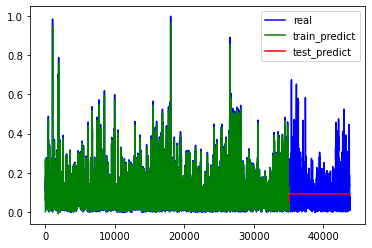

In [88]:
plt.plot(values[:, -1], label="real", c="b")
# 训练集预测结果绿色
plt.plot(list(train_predict), label="train_predict", c="g")
#  测试集预测结果红色
plt.plot([None for _ in train_predict] + list(test_predict), label="test_predict", c="r")
plt.legend(loc="best")
plt.show()

+ 从预测图形看，ARIMA预测效果不如LSTM